# Monte Carlo simulation

# Monte Carlo integrals & error

# Transformations of a distribution

# Inverse sampling

- mention that this is commonly used e.g. in scipy
- special case of transforming a distribution
- mostly in 1-D


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from myst_nb import glue

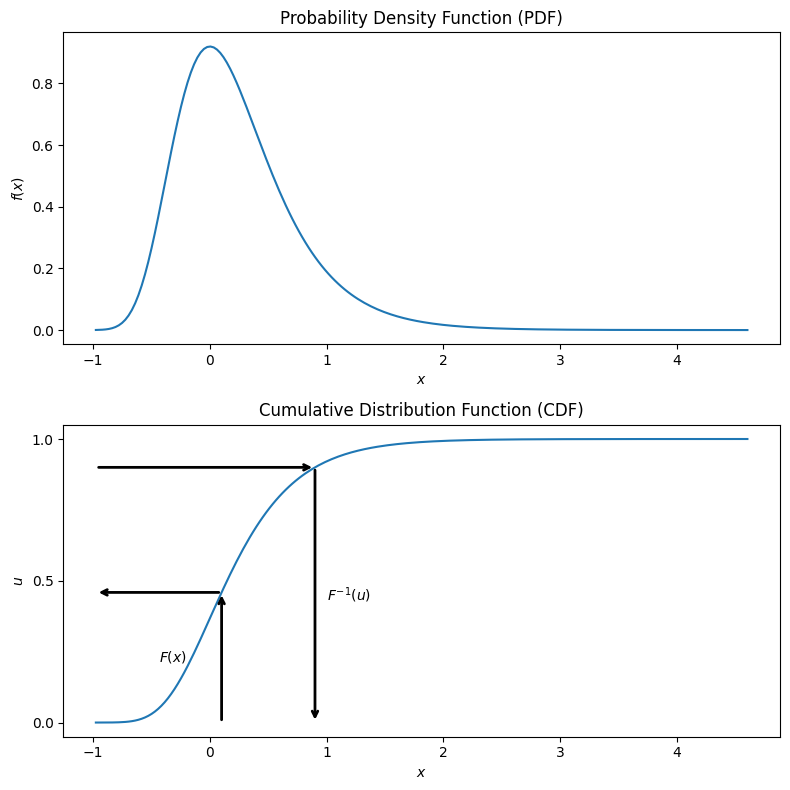

In [9]:
dist = stats.gumbel_r(scale=0.4)

alpha = 1e-5
x = np.linspace(dist.ppf(alpha), dist.ppf(1-alpha), num=200)
u = dist.cdf(x)
p = dist.pdf(x)

# Set up the subplot figure for PDF and CDF side by side
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

# Left subplot: PDF
ax[0].plot(x, p)
ax[0].set_xlabel("$x$")
ax[0].set_ylabel(r"$f(x)$")
ax[0].set_title("Probability Density Function (PDF)")

# Right subplot: CDF with transformation arrows
ax[1].plot(x, u)
ax[1].set_xlabel("$x$")
ax[1].set_ylabel(r"$u$")
ax[1].set_title("Cumulative Distribution Function (CDF)")

# Annotate transformation from x to F(x)
x_value = 0.1  # Example x-value for arrow
u_value = dist.cdf(x_value)

ax[1].annotate(
    "",
    xy=(x_value, u_value),
    xytext=(x_value, 0),
    arrowprops=dict(arrowstyle="->", color="black", lw=2),
)
ax[1].annotate(
    "",
    xytext=(x_value, u_value),
    xy=(x[0], u_value),
    arrowprops=dict(arrowstyle="->", color="black", lw=2),
)
ax[1].text(x_value - 0.3, u_value / 2, "$F(x)$", ha="right", va="center", color="black")
plt.yticks([0, 0.5, 1])

# Annotate transformation from u to F(u)
u_value = 0.9  # Example x-value for arrow
x_value = dist.ppf(u_value)

ax[1].annotate(
    "",
    xytext=(x_value, u_value),
    xy=(x_value, 0),
    arrowprops=dict(arrowstyle="->", color="black", lw=2),
)
ax[1].annotate(
    "",
    xy=(x_value, u_value),
    xytext=(x[0], u_value),
    arrowprops=dict(arrowstyle="->", color="black", lw=2),
)
ax[1].text(
    x_value + 0.1, u_value / 2, "$F^{-1}(u)$", ha="left", va="center", color="black"
)
plt.yticks([0, 0.5, 1])

fig.tight_layout()

glue("inverse_sampling_fig", fig, display=False)

```{glue:figure} inverse_sampling_fig
:figwidth: 300px
:name: "fig-inverse-sampling"

This is a **caption**.
```


# Rejection sampling